<a href="https://colab.research.google.com/github/joiortega1/Deep_Learning/blob/main/Tarea_1/Tarea1_Perceptron_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Perceptrón y Redes Densas
- Ortega Ibarra Jaime Jesús

Resuelve los siguientes ejercicios en libretas de Colab independientes que sean replicables

1. Un perceptrón o neurona no es capaz de aproximar una función que se separe en dos clases (naranja y azul) el conjunto de datos mostrado en la figura. Propón una transformación aplicada a los atributos $x_{1}$ y $x_{2}$ de forma que puedan ser separados por solo un perceptrón. Justifica por que la transformación propuesta funciona.

![An Image](https://github.com/joiortega1/Deep_Learning/blob/main/Tarea1/imagen_figura1.jpeg)

2. Extiende el ejercicio **1c_reglin.ipynb** visto en clase para realizar regresión lineal con los dos atributos de entrada

Importamos librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

Leemos y mostramos nuestros datos

In [3]:
url = 'https://raw.githubusercontent.com/bereml/iap/master/datos/califs.csv'
data = pd.read_csv(url)
data.head

,prev,horas,calif
0,5.6,8.2,5.1
1,6.7,9.3,5.9
2,5.1,10.0,5.4
3,5.7,10.4,6.5
4,7.1,10.4,6.7


Dividiendo nuestros datos en dos atributos de entrada

In [14]:
X_df = data.drop(['calif'], axis=1)
X_v = X_df.values
y_df = data["calif"]
y_v = y_df.values

Visualizando nuestros datos separados

In [9]:
X_df.head()

,prev,horas
0,5.6,8.2
1,6.7,9.3
2,5.1,10.0
3,5.7,10.4
4,7.1,10.4


In [10]:
y_df.head()

0    5.1
1    5.9
2    5.4
3    6.5
4    6.7
Name: calif, dtype: float64

In [15]:
tensor_X = torch.tensor(X_v).type(torch.float32)
tensor_y = torch.tensor(y_v).view(-1, 1).type(torch.float32)

Utilizando la función vista en clase

In [4]:
def train(x, y_true, alpha=0.01, steps=10):
    """Fits linear regression."""

    # ejemplos, atributos
    m, d = x.shape

    # inicialización de parámetros
    w = torch.zeros(d, 1)
    b = torch.zeros(1)

    # histórico de pérdidas
    loss_hist = []

    # ciclo de entrenamiento
    for i in range(steps):

        # cómputo de la hipótesis
        y_pred = x @ w + b

        # cómputo de la pérdida
        loss = (y_pred - y_true).T @ (y_pred - y_true) / (2 * m)

        # cómputo del gradiente
        grad_w = (x.T @ (y_pred - y_true)) / m
        grad_b = (y_pred - y_true).sum() / m

        # actualización de parámetros
        w = w - alpha * grad_w
        b = b - alpha * grad_b

        # histórico de pérdida
        loss_hist.append(loss)

    return w, b, loss_hist

## Steps = 100

In [25]:
w, b, loss_hist = train(tensor_X, tensor_y, steps=100)

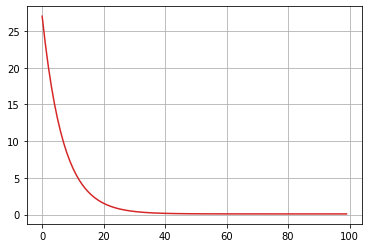

In [24]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.grid()
plt.show()

## Steps = 10

In [26]:
w, b, loss_hist = train(tensor_X, tensor_y)

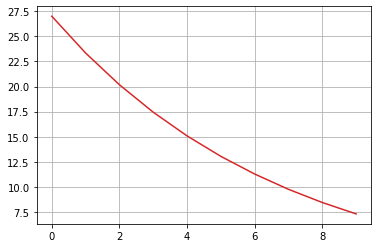

In [27]:
plt.figure()
plt.plot(range(len(loss_hist)), loss_hist, color='tab:red')
plt.grid()
plt.show()

Tal como observamos la evolución de pérdida cambia de manera notable al indicar 10 steps utilizando 2 entradas.